# Peer-graded Assignment: Build a Regression Model in Keras

In this project, you will build a regression model using the Keras library to model the same data about concrete compressive strength that we used in labs 3.


## Load and describe data

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

If the modules fails, clone the docker configuration used \
https://github.com/DavidJulienMillet/IBM-courses

Let's download the data and read it into a pandas dataframe.

In [2]:
df_concrete = pd.read_csv("data/concrete_data.csv")
df_concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa.

In [3]:
df_concrete.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.

Let's check the dataset for any missing values.

In [4]:
df_concrete.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df_concrete.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.

## Prepare train and test data sets

The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns. Split input columns and target column

In [6]:
concrete_cols = df_concrete.columns
predictors = df_concrete[concrete_cols[concrete_cols != 'Strength']] 
target = df_concrete['Strength'] 

Let's do a quick sanity check of the predictors and the target dataframes.

In [7]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Let's save the number of predictors to _ncols since we will need this number when building our network.

In [9]:
n_cols = predictors.shape[1]

## Part A requirements
Build a baseline model (5 marks)

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

5 steps

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

Define the network

In [10]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Define the parameters 

In [11]:
scores_modA = []
nb_epoch = 50

Run the neural networks

In [12]:
for i in range(50):
    # Split the data set to get a manual train/test split
    x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)

    # build the model
    model = regression_model()

    # fit the model
    model.fit(x_train, y_train, epochs=nb_epoch, verbose=0)

    # get the predicitons
    y_pred = model.predict(x_test)

    # get the accuracy score with the test set
    scores_modA.append(mean_squared_error(y_test, y_pred))

In [13]:
mean_scores_modA = np.mean(scores_modA)
print("The mean error is {:.2f}".format(mean_scores_modA))
std_scores_modA = np.std(scores_modA)
print("The standard deviation is {:.2f}".format(std_scores_modA))

The mean error is 422.13
The standard deviation is 707.33


[]

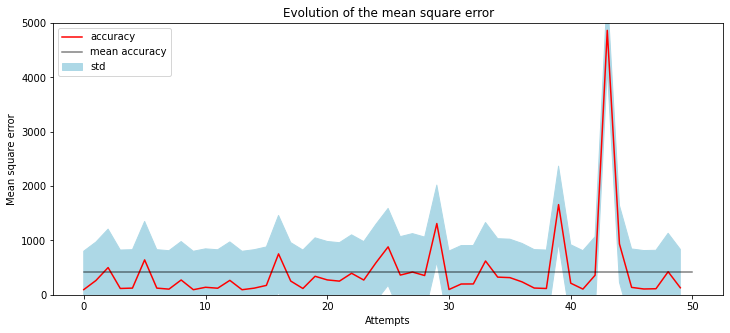

In [37]:
plt.figure(figsize=(12, 5))
plt.title("Evolution of the mean square error")
plt.xlabel("Attempts")
plt.ylabel("Mean square error")
plt.ylim(0, 5000)
plt.plot(range(50), scores_modA, color="red", label="accuracy")
plt.fill_between(range(50), scores_modA - std_scores_modA, scores_modA + std_scores_modA, 
                 color="lightblue", label="std")
plt.plot([0, 50], [mean_scores_modA, mean_scores_modA], color="black", label="mean accuracy", alpha=0.5)
plt.legend()
plt.plot()

## Part B requirements
B. Normalize the data (5 marks)

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.

In [15]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Define the parameters

In [16]:
scores_modB = []
nb_epoch = 50

Run the neural networks

In [17]:
for i in range(50):
    # Split the data set to get a manual train/test split
    x_train, x_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3)

    # build the model
    model = regression_model()

    # fit the model
    model.fit(x_train, y_train, epochs=nb_epoch, verbose=0)

    # get the predicitons
    y_pred = model.predict(x_test)

    # get the accuracy score with the test set
    scores_modB.append(mean_squared_error(y_test, y_pred))

Show the results

In [18]:
mean_scores_modB = np.mean(scores_modB)
print("The mean error is {:.2f}".format(mean_scores_modB))
std_scores_modB  = np.std(scores_modB)
print("The standard deviation is {:.2f}".format(std_scores_modB))

The mean error is 354.09
The standard deviation is 396.91


[]

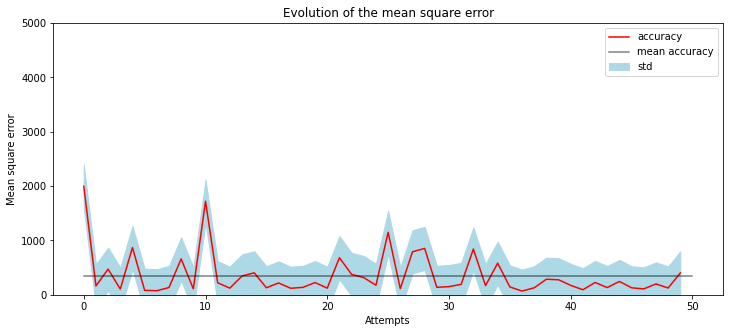

In [38]:
plt.figure(figsize=(12, 5))
plt.title("Evolution of the mean square error")
plt.xlabel("Attempts")
plt.ylabel("Mean square error")
plt.ylim(0, 5000)
plt.plot(range(50), scores_modB, color="red", label="accuracy")
plt.fill_between(range(50), scores_modB - std_scores_modB, scores_modB + std_scores_modB, 
                 color="lightblue", label="std")
plt.plot([0, 50], [mean_scores_modB, mean_scores_modB], color="black", label="mean accuracy", alpha=0.5)
plt.legend()
plt.plot()

In [20]:
mean_diff = mean_scores_modB - mean_scores_modA
print("The difference of the mean of the mean squared errors from the previous model is {:.2f} so {:.2f}%" \
.format(mean_diff, mean_diff / mean_scores_modA * 100))
std_diff = std_scores_modB - std_scores_modA
print("The difference of the standard deviation of the mean squared errors from the \
previous model is {:.2f} so {:.2f}%" \
.format(std_diff, std_diff / std_scores_modA * 100))

The difference of the mean of the mean squared errors from the previous model is -68.04 so -16.12%
The difference of the standard deviation of the mean squared errors from the previous model is -310.41 so -43.89%


## Part C requirements
Increate the number of epochs (5 marks)

Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

Define the parameters 

In [21]:
scores_modC = []
nb_epoch = 100

Run the neural networks

In [22]:
for i in range(50):
    # Split the data set to get a manual train/test split
    x_train, x_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3)

    # build the model
    model = regression_model()

    # fit the model
    model.fit(x_train, y_train, epochs=nb_epoch, verbose=0)

    # get the predicitons
    y_pred = model.predict(x_test)

    # get the accuracy score with the test set
    scores_modC.append(mean_squared_error(y_test, y_pred))

In [23]:
mean_scores_modC = np.mean(scores_modC)
print("The mean error is {:.2f}".format(mean_scores_modC))
std_scores_modC = np.std(scores_modC)
print("The standard deviation is {:.2f}".format(std_scores_modC))

The mean error is 164.10
The standard deviation is 128.87


[]

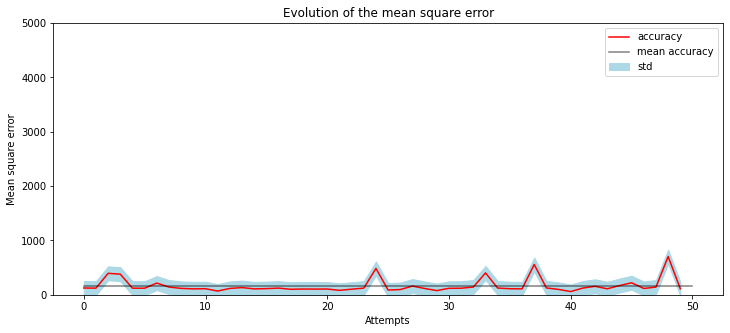

In [39]:
plt.figure(figsize=(12, 5))
plt.title("Evolution of the mean square error")
plt.xlabel("Attempts")
plt.ylabel("Mean square error")
plt.ylim(0, 5000)
plt.plot(range(50), scores_modC, color="red", label="accuracy")
plt.fill_between(range(50), scores_modC - std_scores_modC, scores_modC + std_scores_modC, 
                 color="lightblue", label="std")
plt.plot([0, 50], [mean_scores_modC, mean_scores_modC], color="black", label="mean accuracy", alpha=0.5)
plt.legend()
plt.plot()

In [25]:
mean_diff = mean_scores_modC - mean_scores_modB
print("The difference of the mean of the mean squared errors from the previous model is {:.2f} so {:.2f}%" \
.format(mean_diff, mean_diff / mean_scores_modB * 100))
std_diff = std_scores_modC - std_scores_modB
print("The difference of the standard deviation of the mean squared errors from the \
previous model is {:.2f} so {:.2f}%" \
.format(std_diff, std_diff / std_scores_modB * 100))

The difference of the mean of the mean squared errors from the previous model is -189.99 so -53.65%
The difference of the standard deviation of the mean squared errors from the previous model is -268.04 so -67.53%


## Part D requirements
Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

Define the network

In [26]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Define the parameters 

In [27]:
scores_modD = []
nb_epoch = 50

Run the neural networks

In [28]:
for i in range(50):
    # Split the data set to get a manual train/test split
    x_train, x_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3)

    # build the model
    model = regression_model()

    # fit the model
    model.fit(x_train, y_train, epochs=nb_epoch, verbose=0)

    # get the predicitons
    y_pred = model.predict(x_test)

    # get the accuracy score with the test set
    scores_modD.append(mean_squared_error(y_test, y_pred))

In [29]:
mean_scores_modD = np.mean(scores_modD)
print("The mean error is {:.2f}".format(mean_scores_modD))
std_scores_modD  = np.std(scores_modD)
print("The standard deviation is {:.2f}".format(std_scores_modD))

The mean error is 139.66
The standard deviation is 198.30


[]

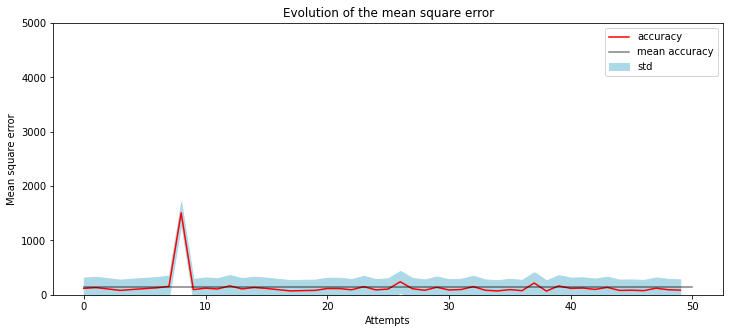

In [40]:
plt.figure(figsize=(12, 5))
plt.title("Evolution of the mean square error")
plt.xlabel("Attempts")
plt.ylabel("Mean square error")
plt.ylim(0, 5000)
plt.plot(range(50), scores_modD, color="red", label="accuracy")
plt.fill_between(range(50), scores_modD - std_scores_modD, scores_modD + std_scores_modD, 
                 color="lightblue", label="std")
plt.plot([0, 50], [mean_scores_modD, mean_scores_modD], color="black", label="mean accuracy", alpha=0.5)
plt.legend()
plt.plot()

In [31]:
mean_diff = mean_scores_modD - mean_scores_modB
print("The difference of the mean of the mean squared errors from the model B is {:.2f} so {:.2f}%" \
.format(mean_diff, mean_diff / mean_scores_modB * 100))
std_diff = mean_scores_modD - std_scores_modB
print("The difference of the standard deviation of the mean squared errors fthe model B is {:.2f} so {:.2f}%" \
.format(std_diff, std_diff / std_scores_modB * 100))

The difference of the mean of the mean squared errors from the model B is -214.43 so -60.56%
The difference of the standard deviation of the mean squared errors fthe model B is -257.25 so -64.81%


# Resume

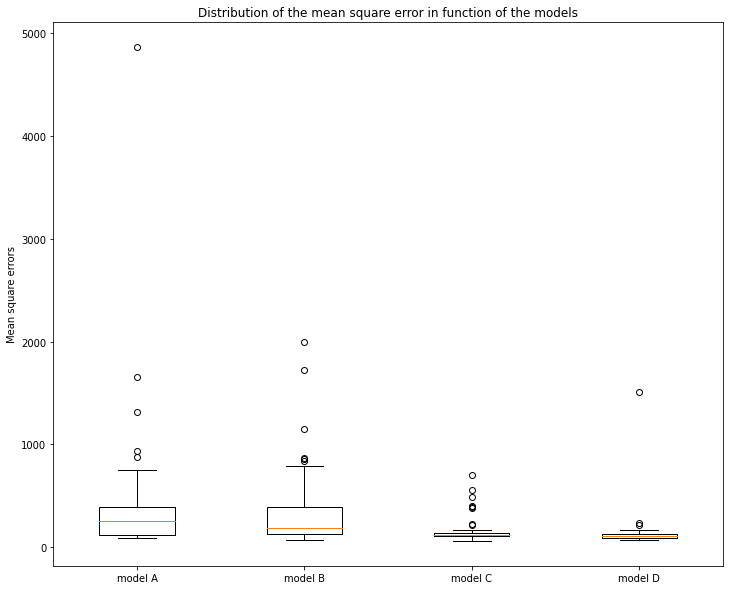

In [34]:
plt.figure(figsize=(12, 10))
plt.title("Distribution of the mean square error in function of the models")
plt.ylabel("Mean square errors")
plt.boxplot([scores_modA, scores_modB, scores_modC, scores_modD])
plt.xticks([1, 2, 3, 4], ["model A", "model B", "model C", "model D"])
plt.show()